In [1]:
import pandas as pd
from prophet import Prophet

In [9]:
df = pd.read_csv('data/vehicules_in_circulation.csv', names=["ds", "y", "total_vehicules"], header=0)
df.head()

,ds,y,total_vehicules
0,1990,7380,3998745
1,1991,9094,4110225
2,1992,9622,4169263
3,1993,9808,4204171
4,1994,9778,4280667


In [19]:
# get ds and y columns
filtered_df = df[["ds", "y"]]
filtered_df["ds"] = pd.to_datetime(filtered_df["ds"], format="%Y") 
filtered_df.head()

/var/folders/z2/gmlvpt9d3rjdtqrm_rph3_rr0000gp/T/ipykernel_44880/4268389332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["ds"] = pd.to_datetime(filtered_df["ds"], format="%Y")


,ds,y
0,1990-01-01,7380
1,1991-01-01,9094
2,1992-01-01,9622
3,1993-01-01,9808
4,1994-01-01,9778


In [20]:
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False)
m.fit(filtered_df)

18:00:34 - cmdstanpy - INFO - Chain [1] start processing


18:00:35 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=10, freq='YE')
future.tail()

,ds
40,2029-12-31
41,2030-12-31
42,2031-12-31
43,2032-12-31
44,2033-12-31


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
40,2029-12-31,226808.000976,118851.514674,332139.826702
41,2030-12-31,234021.780314,126807.092452,339215.967970
42,2031-12-31,241235.559652,133108.217195,340447.116001
43,2032-12-31,248469.102770,140476.081482,347784.549516
44,2033-12-31,255682.882108,157153.468322,366135.767036


/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


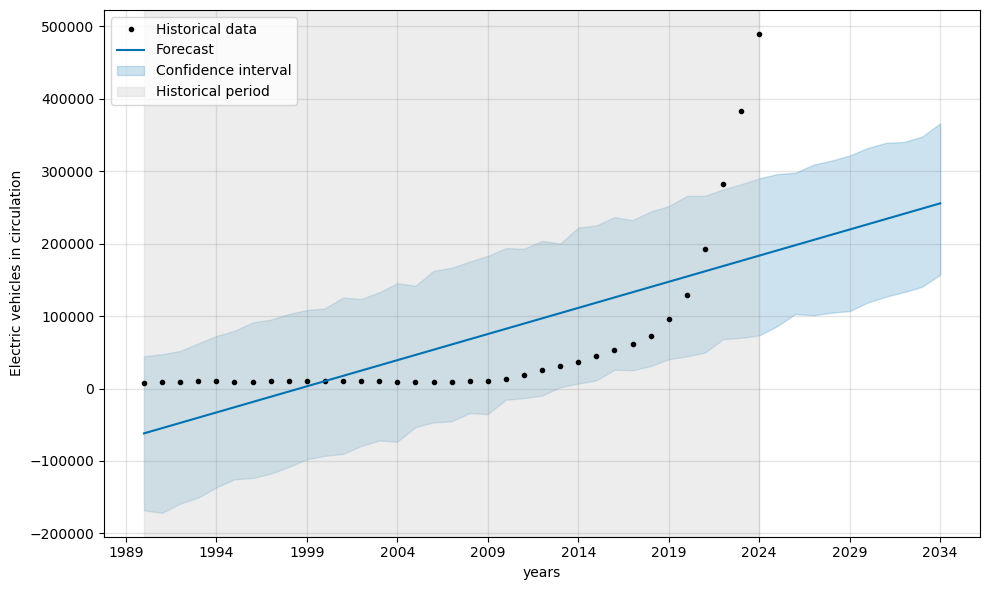

In [34]:
import matplotlib.pyplot as plt

cutoff = filtered_df['ds'].max()

fig1 = m.plot(forecast)
plt.xlabel("years") 
plt.ylabel("Electric vehicles in circulation")  
plt.axvspan(forecast['ds'].min(), cutoff, color='lightgrey', alpha=0.4, label='Historical period')
plt.legend(["Historical data", "Forecast", "Confidence interval", "Historical period"], loc="upper left")

